<a href="https://colab.research.google.com/github/ilakshmiteja/ML-Tasks-Notes/blob/main/continuousDataScaling_DiamondsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Data Pre-processing

In [3]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
df.duplicated().sum()

146

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df = df.reset_index(drop=True)

<Axes: xlabel='price', ylabel='Count'>

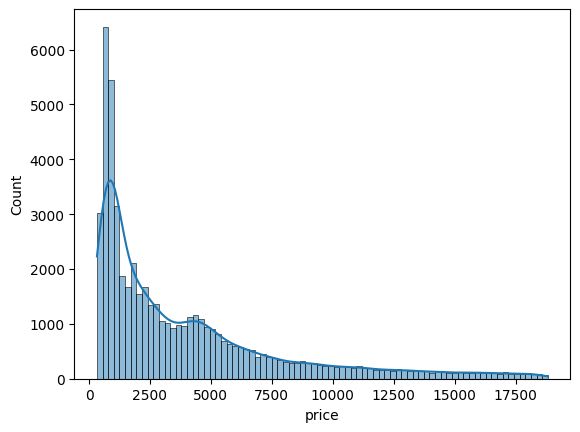

In [7]:
sns.histplot(df['price'],kde= True)

Splitting the data

In [8]:
### Step 1: Splitting the data
y = df['price']
X=df.drop(columns='price')

In [9]:
Xcont,Xcat = X[['carat','depth','table','x','y','z']],X[['cut','color','clarity']]

In [10]:
# we split the data into train and test using sklearn's train-test-split
import sklearn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
Xcont_train,Xcont_test, Xcat_train, Xcat_test, y_train, y_test =train_test_split(Xcont,Xcat,y,
                 test_size = 0.25,
                 random_state = 42
                 )

In [13]:
Xcont_train.shape ,Xcont_test.shape, Xcat_train.shape, Xcat_test.shape, len(y_train), len(y_test)

((40345, 6), (13449, 6), (40345, 3), (13449, 3), 40345, 13449)

#### Normalization - minmaxscaler


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
beforeNormTrain = Xcont_train.copy()
beforeNormTest = Xcont_test.copy()

In [16]:
normScaler = MinMaxScaler()

In [17]:
Xcont_train_norm = pd.DataFrame(normScaler.fit_transform(Xcont_train),
             columns = Xcont_train.columns,
             index = Xcont_train.index)

In [18]:
Xcont_train_norm

,carat,depth,table,x,y,z
12789,0.170478,0.538889,0.269231,0.602421,0.107980,0.496278
19955,0.176715,0.508333,0.307692,0.603352,0.111375,0.496278
6084,0.147609,0.544444,0.288462,0.574488,0.104244,0.477667
37872,0.024948,0.497222,0.269231,0.408752,0.075552,0.334988
24808,0.274428,0.525000,0.250000,0.688082,0.123599,0.563275
...,...,...,...,...,...,...
11284,0.166320,0.483333,0.288462,0.606145,0.109677,0.486352
44732,0.089397,0.519444,0.211538,0.513966,0.094397,0.424318
38158,0.024948,0.522222,0.228846,0.408752,0.075042,0.337469
860,0.145530,0.550000,0.307692,0.570764,0.102377,0.473945


In [19]:
Xcont_test_norm = pd.DataFrame(normScaler.transform(Xcont_test),
             columns = Xcont_test.columns,
             index = Xcont_test.index)

In [20]:
Xcont_test_norm

,carat,depth,table,x,y,z
43520,0.106029,0.608333,0.211538,0.524209,0.093888,0.449132
4264,0.145530,0.500000,0.307692,0.571695,0.104924,0.466501
47271,0.076923,0.530556,0.250000,0.493482,0.090492,0.409429
44300,0.064449,0.541667,0.326923,0.472998,0.086587,0.394541
13943,0.205821,0.536111,0.230769,0.633147,0.115789,0.526055
...,...,...,...,...,...,...
43843,0.024948,0.483333,0.307692,0.408752,0.075042,0.330025
1111,0.110187,0.494444,0.269231,0.540037,0.098981,0.439206
48687,0.066528,0.527778,0.230769,0.479516,0.087946,0.397022
42744,0.074844,0.597222,0.346154,0.486034,0.086418,0.413151


<Axes: xlabel='carat', ylabel='Count'>

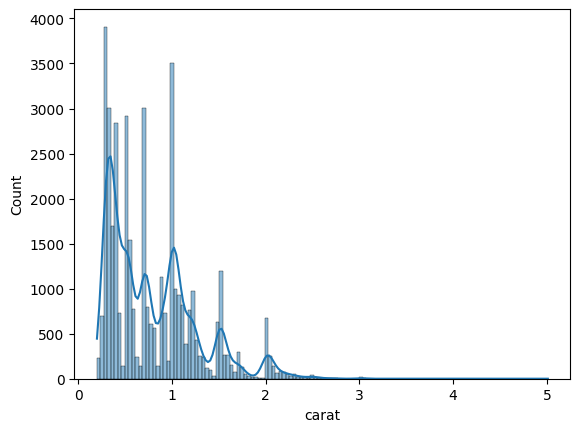

In [21]:
sns.histplot(beforeNormTrain['carat'],kde = True)

<Axes: xlabel='carat', ylabel='Count'>

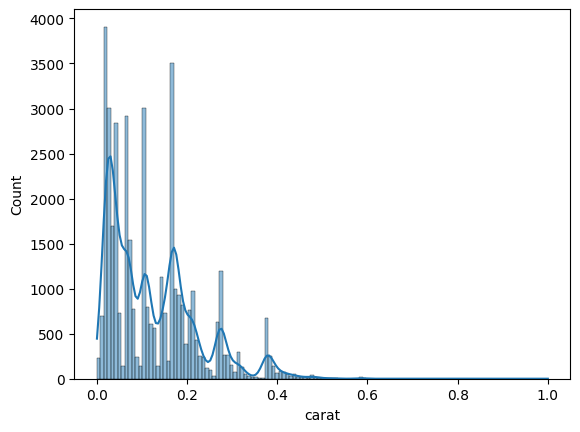

In [22]:
sns.histplot(Xcont_train_norm['carat'],kde = True)

Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
standScaler = StandardScaler()

In [25]:
Xcont_train_stand = pd.DataFrame(standScaler.fit_transform(Xcont_train),
             columns = Xcont_train.columns,
             index = Xcont_train.index)

<Axes: xlabel='carat', ylabel='Count'>

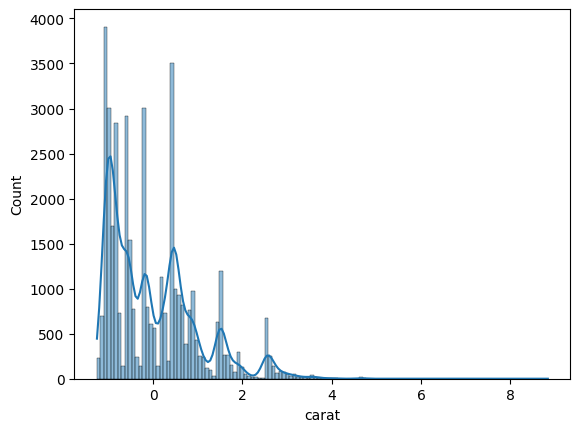

In [26]:
sns.histplot(Xcont_train_stand['carat'],kde = True)

In [27]:
Xcont_train_stand['carat'].mean(),Xcont_train_stand['carat'].std()

(-2.0077301245916822e-16, 1.0000123933398195)

In [28]:
Xcont_test_stand = pd.DataFrame(standScaler.transform(Xcont_test),
             columns = Xcont_test.columns,
             index = Xcont_test.index)

Robust scaler

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
robScaler = RobustScaler()

In [31]:
Xcont_train_robust = pd.DataFrame(robScaler.fit_transform(Xcont_train),
             columns = Xcont_train.columns,
             index = Xcont_train.index)

<Axes: xlabel='carat', ylabel='Count'>

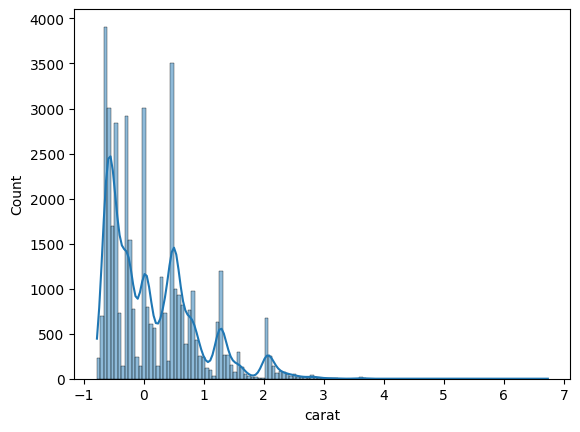

In [32]:
sns.histplot(Xcont_train_robust['carat'],kde = True)

In [33]:
Xcont_test_robust = pd.DataFrame(robScaler.transform(Xcont_test),
             columns = Xcont_test.columns,
             index = Xcont_test.index)

In [34]:
Xcont_train_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40345.0,0.154850,0.744030,-0.781250,-0.468750,0.0,0.531250,6.734375
depth,40345.0,-0.034056,0.953277,-12.533333,-0.533333,0.0,0.466667,11.466667
table,40345.0,0.153912,0.745320,-4.666667,-0.333333,0.0,0.666667,12.666667
x,40345.0,0.023441,0.614872,-3.109290,-0.535519,0.0,0.464481,2.759563
y,40345.0,0.014655,0.634560,-3.137363,-0.543956,0.0,0.456044,29.225275
z,40345.0,0.017128,0.616910,-3.115044,-0.539823,0.0,0.460177,4.017699


Applying log function transformer on carat feature




In [40]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log1p)
xcont_train_carat_trans = ft.fit_transform(Xcont_train['carat'])

<Axes: xlabel='carat', ylabel='Count'>

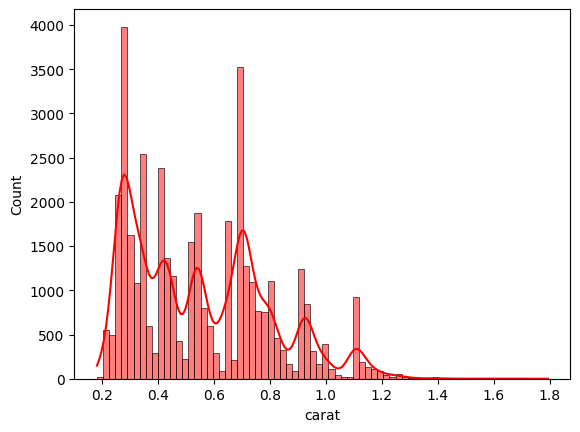

In [44]:
sns.histplot(xcont_train_carat_trans,kde=True,color='red') ## After tranformation


<Axes: xlabel='carat', ylabel='Count'>

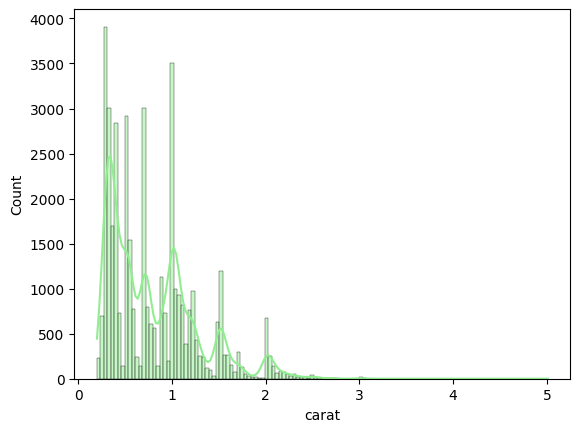

In [47]:
sns.histplot(Xcont_train['carat'],kde=True,color='lightgreen') ## before tranformation